# Script A: literature review and power analysis

## Libraries

In [ ]:
library(osfr)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'rstatix'

The following object is masked from 'package:stats':

    filter

## Literature review: summary of results

In [ ]:
#|

lit_effects_tbl_filename <- "../supplemental-data/MaskedPrimingDatabase-IDPriming-InteractionFrequency.csv"

lit_effects <- read_csv(lit_effects_tbl_filename)


Rows: 18 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): PAPER, LANGUAGE, PRIME_DURATION, p<.05?
dbl (4): N, MOP_HF, MOP_LF, MOP_Interaction

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 17 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): file_name, PAPER, EXP.
dbl (8): nsubj, minPower, maxPower, rho_min, std_dev_min, rho_max, std_dev_m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 17 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): file_name, PAPER, EXP.
dbl (8): nsubj, minPower, maxPower, rho_min, std_dev_min, rho_max, std_dev_m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### Frequency skew across databases

In [ ]:

freqSkew <- list.files(path="../supplemental-data/", pattern="_skew_", full.names = T) %>%
  lapply(function(x) read_csv(x)) %>% bind_rows()


Rows: 5 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): KF, HAL, SUBTLEX-US

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): KF, HAL, SUBTLEX-US

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): KF, HAL, SUBTLEX-US

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### Power analysis

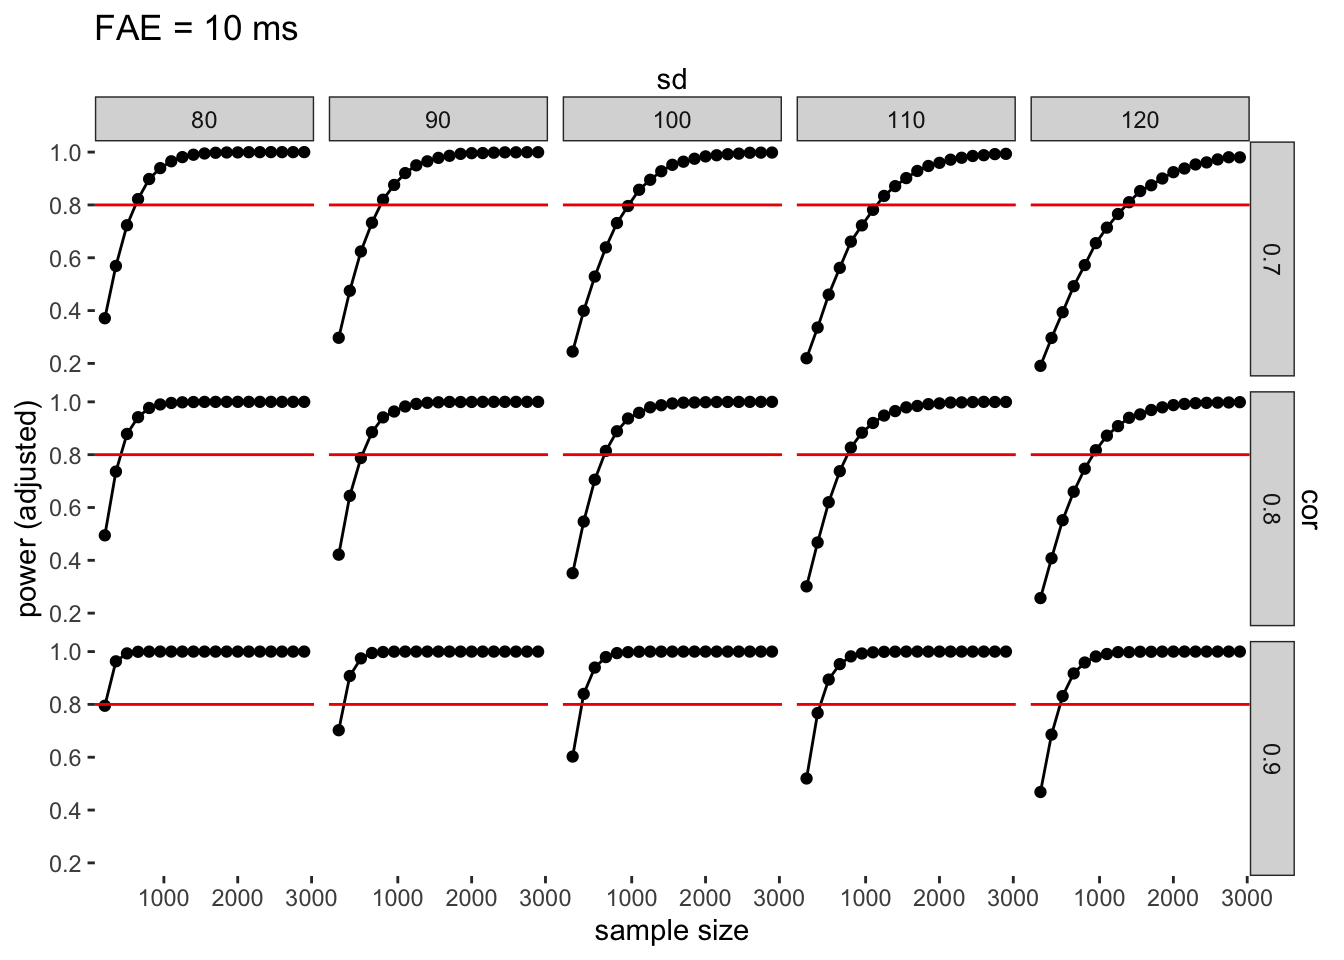

In [ ]:

load("../supplemental-data/freq_atten_exp2.10ms.RData")

freq_atten_exp2.10ms_df.sub <- freq_atten_exp2.10ms_df %>% 
  filter(ES == 10) %>%
  filter(std_dev >= 80 & std_dev <= 120) %>%
  filter(rho >= 0.7 & rho <= 0.9)

freq_atten_exp2.10ms_df.sub |>
  ggplot(aes(y = power_unadjusted, x = nsubj)) + 
    geom_line() + 
    geom_point() +
    geom_hline(yintercept = 0.8, color = "red2") + 
    facet_grid(rho ~ std_dev) +
  scale_x_continuous(sec.axis = sec_axis(~ . , name = "sd", breaks = NULL, labels = NULL)) +
  scale_y_continuous(sec.axis = sec_axis(~ . , name = "cor", breaks = NULL, labels = NULL)) +
  theme_bw()+
    theme(#axis.line = element_line(colour = "black"),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(), 
      panel.border = element_blank(),
      legend.position="none"
      #panel.background = element_blank() 
     )+
  labs(title="FAE = 10 ms", y = "power (adjusted)", x = "sample size")
